In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , GridSearchCV
from sklearn.preprocessing import MinMaxScaler  , LabelEncoder , StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR , LinearSVR
from sklearn.linear_model import LinearRegression


In [253]:
df = pd.read_csv("../csvs/Regression/Training_Dataset.csv")

In [254]:
df.describe()

,Composition (X),Property (Y)
count,50.000000,50.000000
mean,5.886600,0.543336
std,2.419715,0.501293
min,1.190000,-0.151000
25%,4.152500,0.314250
50%,6.145000,0.461000
75%,8.020000,0.660750
max,9.690000,2.680000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Composition (X)  50 non-null     float64
 1   Property (Y)     50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


<Axes: >

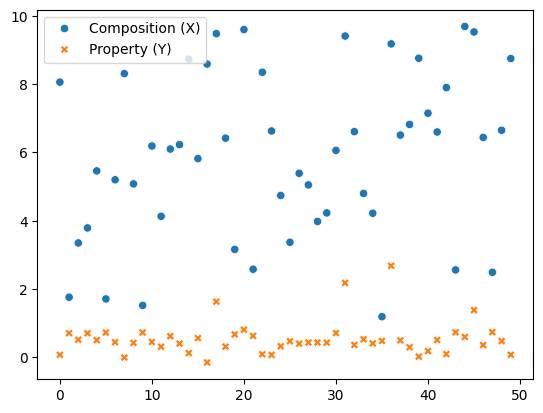

In [256]:
sns.scatterplot(data = df)

In [257]:
df

,Composition (X),Property (Y)
0,8.06,0.0742
1,1.76,0.7080
2,3.35,0.5150
3,3.79,0.7060
4,5.46,0.5030
5,1.71,0.7260
6,5.20,0.4450
7,8.31,-0.0046
8,5.08,0.4240
9,1.52,0.7280


<Axes: xlabel='Composition (X)', ylabel='Property (Y)'>

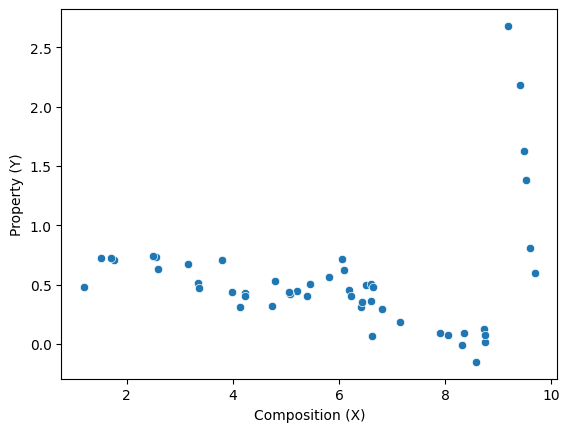

In [258]:
sns.scatterplot(data = df , x ="Composition (X)" , y= "Property (Y)")

<Axes: ylabel='Density'>

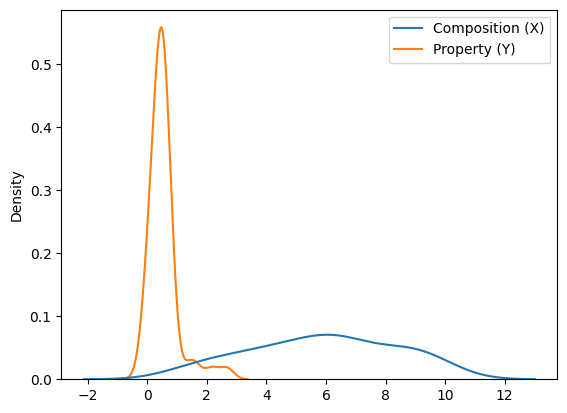

In [259]:
sns.kdeplot(data = df)

<Axes: ylabel='count'>

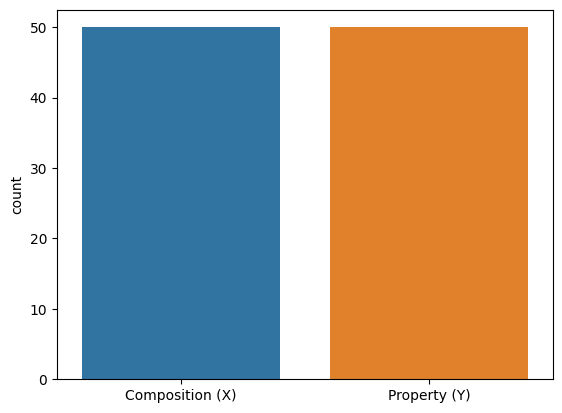

In [260]:
sns.countplot(data = df)

<Axes: >

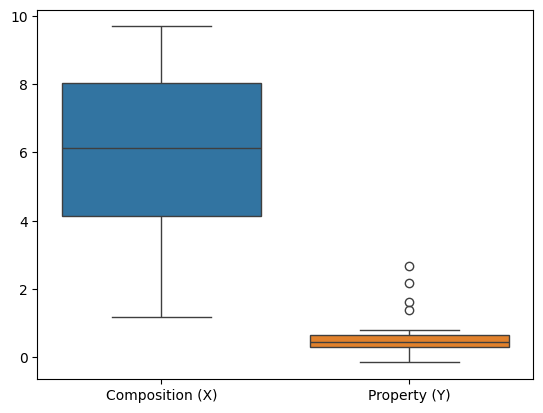

In [261]:
sns.boxplot(data = df)

In [262]:
df.isnull().sum()

Composition (X)    0
Property (Y)       0
dtype: int64

In [263]:
X = df.drop(["Property (Y)"], axis = 1).values
print(X.shape)
X

(50, 1)


array([[8.06],
       [1.76],
       [3.35],
       [3.79],
       [5.46],
       [1.71],
       [5.2 ],
       [8.31],
       [5.08],
       [1.52],
       [6.19],
       [4.13],
       [6.1 ],
       [6.23],
       [8.73],
       [5.82],
       [8.59],
       [9.48],
       [6.42],
       [3.16],
       [9.6 ],
       [2.58],
       [8.35],
       [6.63],
       [4.74],
       [3.37],
       [5.39],
       [5.05],
       [3.98],
       [4.23],
       [6.06],
       [9.41],
       [6.61],
       [4.8 ],
       [4.22],
       [1.19],
       [9.18],
       [6.51],
       [6.82],
       [8.76],
       [7.15],
       [6.6 ],
       [7.9 ],
       [2.56],
       [9.69],
       [9.53],
       [6.44],
       [2.49],
       [6.65],
       [8.75]])

In [264]:
y = df["Property (Y)"].values.reshape(-1,1)
print(y.shape)
y

(50, 1)


array([[ 0.0742],
       [ 0.708 ],
       [ 0.515 ],
       [ 0.706 ],
       [ 0.503 ],
       [ 0.726 ],
       [ 0.445 ],
       [-0.0046],
       [ 0.424 ],
       [ 0.728 ],
       [ 0.452 ],
       [ 0.311 ],
       [ 0.62  ],
       [ 0.402 ],
       [ 0.124 ],
       [ 0.561 ],
       [-0.151 ],
       [ 1.63  ],
       [ 0.311 ],
       [ 0.671 ],
       [ 0.81  ],
       [ 0.63  ],
       [ 0.0917],
       [ 0.0706],
       [ 0.324 ],
       [ 0.47  ],
       [ 0.402 ],
       [ 0.435 ],
       [ 0.435 ],
       [ 0.431 ],
       [ 0.712 ],
       [ 2.18  ],
       [ 0.363 ],
       [ 0.531 ],
       [ 0.406 ],
       [ 0.482 ],
       [ 2.68  ],
       [ 0.497 ],
       [ 0.297 ],
       [ 0.0203],
       [ 0.182 ],
       [ 0.507 ],
       [ 0.0959],
       [ 0.734 ],
       [ 0.597 ],
       [ 1.38  ],
       [ 0.358 ],
       [ 0.738 ],
       [ 0.478 ],
       [ 0.0737]])

In [265]:
le = LabelEncoder()
y = le.fit_transform(y)

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [266]:
X_train, X_test ,y_train , y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     train_size=0.8,
                                                     shuffle=True)

In [267]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [268]:
print("Maximalwert von X_train:", X_train.max())
print("\nMaximalwert von X_test:", X_test.max())

print("Minimalwert von X_train:", X_train.min())
print("\nMinimalwert von X_test:", X_test.min())

print("Maximalwert von y_train:", y_train.max())
print("Minimalwert von y_train:", y_train.min())

print("\nMaximalwert von y_test:", y_test.max())
print("Minimalwert von y_test:", y_test.min())


Maximalwert von X_train: 0.9999999999999999

Maximalwert von X_test: 0.9752941176470588
Minimalwert von X_train: 0.0

Minimalwert von X_test: 0.15294117647058827
Maximalwert von y_train: 46
Minimalwert von y_train: 0

Maximalwert von y_test: 45
Minimalwert von y_test: 1


In [269]:
def performance(reg , X_train , y_train , X_test , y_test):
    
    reg.fit(X_train , y_train)
    
    reg_pred = reg.predict(X_test)
    
    mae = print(f"mae is {mean_absolute_error(y_test , reg_pred)}")
    mae
    
    mse = print(mean_squared_error(y_test , reg_pred))
    mse
    

In [270]:
reg = RandomForestRegressor()
performance(reg , X_train , y_train , X_test , y_test)

mae is 3.7080000000000006
18.630920000000003


In [271]:
reg = DecisionTreeRegressor()
performance(reg , X_train , y_train , X_test , y_test)

mae is 3.2
15.0


In [272]:
reg = SVR()
performance(reg , X_train , y_train , X_test , y_test)

mae is 15.069142949953838
269.95037382934936


In [273]:
reg = LinearSVR()
performance(reg , X_train , y_train , X_test , y_test)

mae is 18.624526172638234
401.0615940411006


g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [274]:
reg = LinearRegression()
performance(reg , X_train , y_train , X_test , y_test)

mae is 14.661366248887441
279.47906445924417


In [275]:
#final_regressor = DecisionTreeRegressor()
#
#final_regressor_param_grid = {
#    "criterion": ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'],
#    "max_depth" : [1, 5, 10, 50, 100, 500, 1000, 5000],
#    "max_features":[1,10,50,100,500,1000],
#    "min_impurity_decrease": [1, 5, 10, 50, 100, 500, 1000, 1e-4, 1e-9, 2e-4, 9]
#}
#
#decision_grid = GridSearchCV(estimator= final_regressor , param_grid = final_regressor_param_grid)
#decision_grid.fit(X_train ,y_train)
#
#print(f"best_estimator : {decision_grid.best_estimator_}")
#print(f"and best_params : {decision_grid.best_params_}")
#
##best_estimator : DecisionTreeRegressor(max_depth=5, max_features=1, min_impurity_decrease=10)
##and best_params : {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1, 'min_impurity_decrease': 10}

In [276]:
#final_svr = SVR()
#svr_param = {
#    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
#    "degree" : [ 6e-9 ,1e-6 ,2e-4 , 1e-3,1 , 10, 50, 100,500],
#    "C" : [ 1e-4 , 2e-4 , 6e-9 , 10 , 1 ,50, 100, 1000 , 9e-9],
#    "degree" : [1 , 2 ,5 , 10 ,50, 100, 500 ,100 , 1000]
#}
#
#svr_grid = GridSearchCV(estimator= final_svr , param_grid = svr_param)
#svr_grid.fit(X_train ,y_train)
#
#print(f"best_estimator : {svr_grid.best_estimator_}")
#print(f"and best_params : {svr_grid.best_params_}")
#

In [277]:
final_reg = DecisionTreeRegressor(criterion="squared_error",
                                  max_depth = 5,
                                  max_features = 1,
                                  min_impurity_decrease=10)

final_reg.fit(X_train , y_train)

final_pred = final_reg.predict(X_test)

mae = mean_absolute_error(y_test , final_pred)

mse = mean_squared_error(y_test , final_pred)
print(f"mean_error : {mae}")
print(f"means_squared_error : {mse}")
mse

mean_error : 6.002380952380952
means_squared_error : 63.316609977324276


63.316609977324276

In [278]:
sample = pd.read_csv("../csvs/Regression/Sample_submission.csv")
test_data = pd.read_csv("../csvs/Regression/Test_Dataset.csv")
test_data

,Composition (X)
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04
...,...
945,9.96
946,9.97
947,9.98
948,9.99


In [279]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
sc_test_data = sc.transform(test_data)

final_pred =  final_reg.predict(sc_test_data)
test_data["Property (Y)"] = final_pred
test_data["Composition (X)"] = sample["Composition (X)"]
test_data[["Composition (X)" , "Property (Y)"]].to_csv("SPring_Competition.csv" , index = False)


g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [280]:
test_data

,Composition (X),Property (Y)
0,0.00,33.5
1,0.01,33.5
2,0.02,33.5
3,0.03,33.5
4,0.04,33.5
...,...,...
945,9.96,40.5
946,9.97,40.5
947,9.98,40.5
948,9.99,40.5
